In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [2]:
beta0=1
beta1=2
beta2=1.5


In [3]:
def make_Exp(X,beta0,beta1,beta2):
    mone=np.exp(beta0+X[:,0]*beta1+X[:,1]*beta2)
    mechane=1+mone
    return (mone/mechane)

In [4]:
nn=np.arange(100,20100,100).tolist()
X1_C=[]
X2_C=[]
X0_C=[]
for i  in nn:
    X=np.random.normal(0, 1, size=(i, 2))
    p=make_Exp(X,beta0,beta1,beta2)
    y=np.random.binomial(1, p=p)
    clf = LogisticRegression().fit(X, y)
    if i ==100:
        print ('regression coefficients for n=100:',clf.coef_,clf.intercept_)
    if i ==20000:
        print ('regression coefficients for n=20,000:',clf.coef_,clf.intercept_)
    X1_C.append(clf.coef_[0])
    X0_C.append(clf.intercept_)
    #X2_C.append(clf.coef_[1])
    
    

regression coefficients for n=100: [[1.84783915 0.91830022]] [1.38093333]
regression coefficients for n=20,000: [[1.98368189 1.50152986]] [0.99398569]


In [5]:
X1_C = np.array(X1_C)
X1_C1=X1_C[:,0]
X2_C=X1_C[:,1]
X0_C = np.array(X0_C)

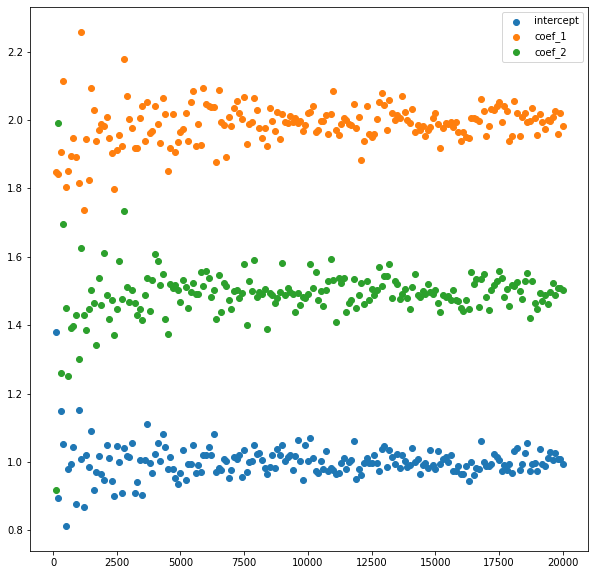

In [6]:
fig,ax=plt.subplots(1,1,figsize=(10, 10))
# plt.plot(X0_C,nn)

plt.scatter(nn,X0_C)
plt.scatter(nn,X1_C1)
plt.scatter(nn,X2_C)
ax.legend(['intercept','coef_1','coef_2'])
plt.show()

In [11]:
# X=np.fromfile('x.dat').reshape(-1, 1)
# y=np.fromfile('y.dat')
# X.shape

(165, 1)

# 3.4 log_loss calc 

In [32]:
import pandas as pd
y = np.loadtxt('y.dat', unpack = True)
X = np.loadtxt('x.dat', unpack = True).reshape(40,2)
clf = LogisticRegression().fit(X, y)
pred=clf.predict(X)
from sklearn.metrics import log_loss
print(log_loss(pred,y))

11.225202278024748
